In [19]:
%matplotlib notebook

import matplotlib.pyplot as plt
from IPython.display import display
import neurokit2 as nk
import pandas as pd
import numpy as np
import seaborn as sns
import os
import pickle
import xlsxwriter

#Change this for each participant
part_number = '215'

# Set matplotlib parameters for displaying graphs
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = [9, 4.5]  # Bigger images
plt.rcParams['font.size']= 14
pd.set_option('display.max_columns', None)

save_dir = '../data/part'+part_number+'/figures/'

p = '../data/part'+part_number+'/part'+part_number+'_pilot_ecg_signals.p'
ecg = pickle.load(open(p,"rb"))
eda = pickle.load(open('../data/part'+part_number+'/part'+part_number+'_pilot_eda_signals.p',"rb"))
rsp = pickle.load(open('../data/part'+part_number+'/part'+part_number+'_pilot_rsp_signals.p',"rb"))
baseline_fn = '../data/part'+part_number+'/part'+part_number+'_baseline_ecg_signals.p'
baseline2_fn = '../data/part'+part_number+'/part'+part_number+'_baseline_eda_signals.p'
baseline3_fn = '../data/part'+part_number+'/part'+part_number+'_baseline_rsp_signals.p'
ecg_baseline = pickle.load(open(baseline_fn,"rb"))
eda_baseline = pickle.load(open(baseline2_fn,"rb"))
rsp_baseline = pickle.load(open(baseline3_fn,"rb"))

data_file = '../data/part'+part_number+'/part'+part_number+'_pilot.acq'
rate = 2000

data, sampling_rate = nk.read_acqknowledge(data_file)
data = data.rename(columns={"RSP, X, RSPEC-R": "RSP", "DTU100 - Trigger View, AMI / HLT - A11": "TRIG",
                            "EDA, X, PPGED-R": "EDA", "ECG, X, RSPEC-R": "ECG"})

timestamps=np.loadtxt('../support/trigger timestamps/trigger timestamps.csv',dtype='int',delimiter=',')
start_times = timestamps[int(part_number[-2:]) - 1]
feedback_times = timestamps[int(part_number[-2:]) - 1 + 15]

taskloads_all = np.loadtxt('../support/taskload settings/taskload settings.csv',dtype='int',delimiter=',',encoding='UTF-8')
taskload_settings = taskloads_all[int(part_number[-2:]) - 1]

durations = [100,100,100,100,100,100,100,100,100,100,100,100]
#durations = [633339, 472624, 462436, 479671, 443789, 460186, 451913, 467455, 465081, 407503, 453908, 453551]

events = {}
events['onset'] = start_times
events['duration'] = durations
events['label']=  [1,2,3,4,5,6,7,8,9,10,11,12]
events['condition'] =  taskload_settings
#events['trust'] = trust_settings DOES NOT WORK!

events_feedback = {}
events_feedback['onset'] = feedback_times
events_feedback['duration'] = durations
events_feedback['label']=  [1,2,3,4,5,6,7,8,9,10,11,12]
events_feedback['condition'] =  taskload_settings

ecg_pilot_interval = nk.epochs_create(ecg, events, sampling_rate=rate, epochs_start=0, epochs_end=50)
eda_pilot_interval = nk.epochs_create(eda, events, sampling_rate=rate, epochs_start=0, epochs_end=50)
rsp_pilot_interval = nk.epochs_create(rsp, events, sampling_rate=rate, epochs_start=0, epochs_end=50)

ecg_trust_interval = nk.epochs_create(ecg,events,sampling_rate=rate,epochs_start=50,epochs_end=70)
eda_trust_interval = nk.epochs_create(eda,events,sampling_rate=rate,epochs_start=50,epochs_end=70)
rsp_trust_interval = nk.epochs_create(rsp,events,sampling_rate=rate,epochs_start=50,epochs_end=70)

ecg_trust_event = nk.epochs_create(ecg,events_feedback,sampling_rate=rate,epochs_start=-5,epochs_end=20)
eda_trust_event = nk.epochs_create(eda,events_feedback,sampling_rate=rate,epochs_start=-5,epochs_end=20)
rsp_trust_event = nk.epochs_create(rsp,events_feedback,sampling_rate=rate,epochs_start=-5,epochs_end=20)

pi_high_tl = {}
hc=1
pi_med_tl = {}
mc=1
pi_low_tl = {}
lc=1
for i in range(1,13):
    if (ecg_pilot_interval[i]['Condition'].iloc[0] == 4.0):
        pi_high_tl[hc] = ecg_pilot_interval[i]
        hc+=1
    if (ecg_pilot_interval[i]['Condition'].iloc[0] == 3.0):
        pi_med_tl[mc] = ecg_pilot_interval[i]
        mc+=1
    if (ecg_pilot_interval[i]['Condition'].iloc[0] == 2.0):
        pi_low_tl[lc] = ecg_pilot_interval[i]
        lc+=1

for i in range(1,13):
    if (eda_pilot_interval[i]['Condition'].iloc[0] == 4.0):
        pi_high_tl[hc] = eda_pilot_interval[i]
        hc+=1
    if (eda_pilot_interval[i]['Condition'].iloc[0] == 3.0):
        pi_med_tl[mc] = eda_pilot_interval[i]
        mc+=1
    if (eda_pilot_interval[i]['Condition'].iloc[0] == 2.0):
        pi_low_tl[lc] = eda_pilot_interval[i]
        lc+=1
            
for i in range(1,13):
    if (rsp_pilot_interval[i]['Condition'].iloc[0] == 4.0):
        pi_high_tl[hc] = rsp_pilot_interval[i]
        hc+=1
    if (rsp_pilot_interval[i]['Condition'].iloc[0] == 3.0):
        pi_med_tl[mc] = rsp_pilot_interval[i]
        mc+=1
    if (rsp_pilot_interval[i]['Condition'].iloc[0] == 2.0):
        pi_low_tl[lc] = rsp_pilot_interval[i]
        lc+=1
        
x_axis_pilot = np.linspace(0, ecg_pilot_interval[1].shape[0]/ sampling_rate, ecg_pilot_interval[1].shape[0])

In [20]:
hrv_high = []
for index in range(1,5):
    
    condition = 'High'


    peaks_all = pi_high_tl[index]['ECG_R_Peaks'][:]
    hrv_high.append(nk.hrv_frequency(peaks_all, sampling_rate=sampling_rate, show=True))
    #plt.savefig('../data/part'+str(part_number)+'/figures/'+condition + ' TL instance ' + str(index) + ' PSD All 50s.jpg')


hrv_high[2]


condition = 'Medium'
hrv_med = []
for index in range(1,5):
    peaks_all = pi_med_tl[index]['ECG_R_Peaks'][:]
    hrv_med.append(nk.hrv_frequency(peaks_all, sampling_rate=sampling_rate, show=True))
    #plt.savefig('../data/part'+str(part_number)+'/figures/'+condition + ' TL instance ' + str(index) + ' PSD All 50s.jpg')



condition = 'Low'
hrv_low = []
for index in range(1,5):
    peaks_all = pi_low_tl[index]['ECG_R_Peaks'][:]
    hrv_low.append(nk.hrv_frequency(peaks_all, sampling_rate=sampling_rate, show=True))

    #plt.savefig('../data/part'+str(part_number)+'/figures/'+condition + ' TL instance ' + str(index) + ' PSD All 50s.jpg')


plt.close('all')
hrv_low[3]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,NaN,NaN,NaN,0.078336,0.011985,NaN,NaN,0.86731,-2.546749


In [21]:
filepath = '../data/part'+part_number+'/HRV_HFn.csv'
f=open(filepath,'ab')
for iind in range(4):
    np.savetxt(f,hrv_low[iind])
for iind in range(4):
    np.savetxt(f,hrv_med[iind])
for iind in range(4):
    np.savetxt(f,hrv_high[iind])
f.close()

In [32]:
hrv_high[1]

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,NaN,NaN,NaN,0.075112,0.011912,NaN,NaN,0.863118,-2.588782


In [39]:
display(nk.ecg_intervalrelated(ecg_pilot_interval[1],sampling_rate=2000))

,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_TINN,HRV_HTI,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn
0,98.450847,33.599386,608.62963,45.649396,33.804033,0.075004,0.055205,598.0,42.2541,0.070659,57.5,9.876543,51.851852,194.5,4.05,NaN,NaN,NaN,0.070367,0.006529,NaN,NaN,0.915094,-2.654037,23.903061,60.15744,0.397342,4517.443649,2.516725,4.361863,605.599028,0.481481,0.487179,0.684211,0.086957,48.683592,48.686982,48.686838,56.410256,0.555634,0.444366,17.821415,15.937427,0.446334,0.553666,40.190112,44.762401,0.461243,0.538757,31.08736,33.598171,0.533752,1.609438


In [40]:
display(nk.ecg_intervalrelated(ecg_pilot_interval[1]))

,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_TINN,HRV_HTI,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn
0,98.450847,67.198772,1217.259259,91.298792,67.608066,0.075004,0.055205,1196.0,84.5082,0.070659,115.0,48.148148,77.777778,389.0,4.05,NaN,NaN,NaN,0.013275,0.000415,NaN,NaN,0.969716,-4.321905,47.806122,120.314881,0.397342,18069.774597,2.516725,4.963923,1211.198057,0.481481,0.487179,0.684211,0.086957,48.683592,48.686982,48.686838,56.410256,0.555634,0.444366,35.642831,31.874854,0.446334,0.553666,80.380224,89.524802,0.461243,0.538757,62.174721,67.196341,0.533752,1.609438


In [38]:

nk.hrv(ecg_pilot_interval[1]['ECG_R_Peaks'], sampling_rate=2000, show=False)

,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_TINN,HRV_HTI,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn
0,33.599386,608.62963,45.649396,33.804033,0.075004,0.055205,598.0,42.2541,0.070659,57.5,9.876543,51.851852,194.5,4.05,NaN,NaN,NaN,0.070367,0.006529,NaN,NaN,0.915094,-2.654037,23.903061,60.15744,0.397342,4517.443649,2.516725,4.361863,605.599028,0.481481,0.487179,0.684211,0.086957,48.683592,48.686982,48.686838,56.410256,0.555634,0.444366,17.821415,15.937427,0.446334,0.553666,40.190112,44.762401,0.461243,0.538757,31.08736,33.598171,0.533752,1.609438


In [34]:
ecg_pilot_interval[1]

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_Q_Peaks,ECG_S_Peaks,ECG_T_Peaks,ECG_P_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular,Index,Label,Condition
0.0000,-0.033264,-0.023902,84.576712,0.959440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.813253,0.0,0.396465,241787,1,4
0.0005,-0.029449,-0.023432,84.575489,0.959408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.814114,0.0,0.397727,241788,1,4
0.0010,-0.026093,-0.023001,84.574267,0.959376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.814974,0.0,0.398990,241789,1,4
0.0015,-0.022278,-0.022615,84.573048,0.959345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.815835,0.0,0.400253,241790,1,4
0.0020,-0.018921,-0.022280,84.571831,0.959313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.816695,0.0,0.401515,241791,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49.9980,0.001373,0.017278,98.936487,0.936579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.444653,0.0,0.333333,341782,1,4
49.9985,0.007782,0.017985,98.935446,0.936578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.446529,0.0,0.335586,341783,1,4
49.9990,0.013580,0.018707,98.934408,0.936577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.448405,0.0,0.337838,341784,1,4
49.9995,0.018768,0.019438,98.933373,0.936576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.450281,0.0,0.340090,341785,1,4


<IPython.core.display.Javascript object>


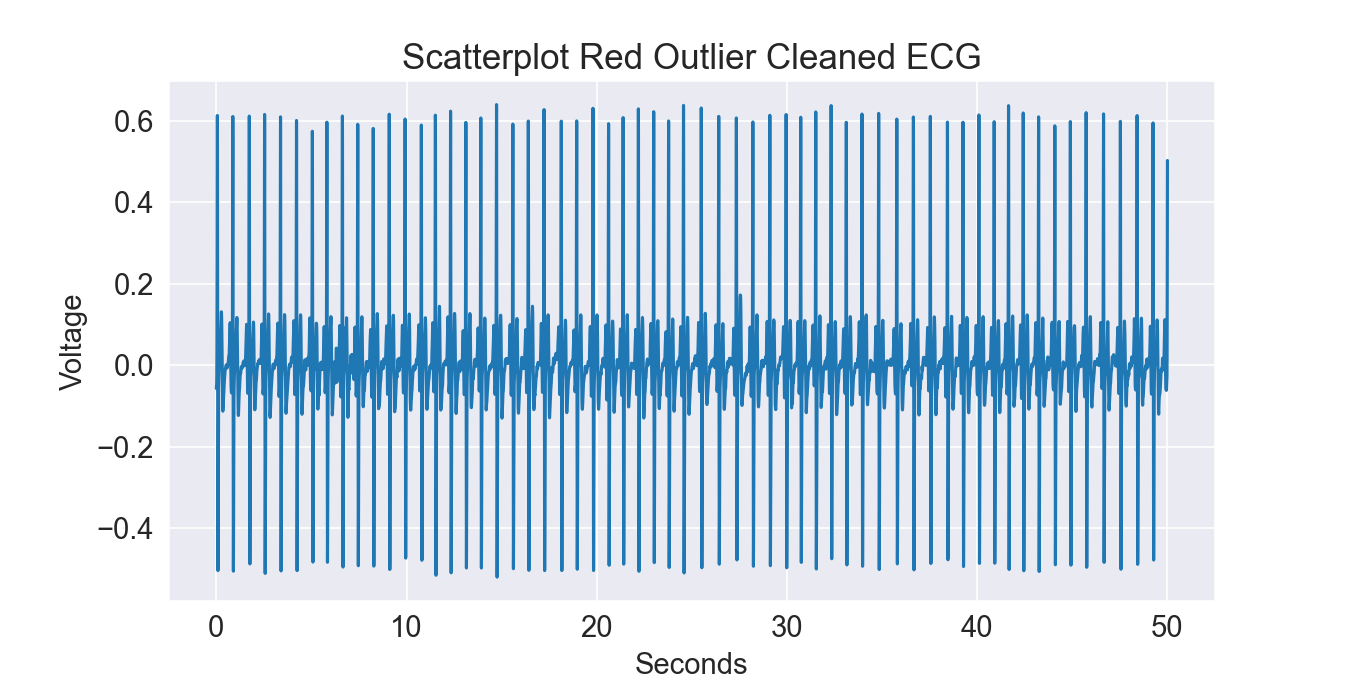

Text(0, 0.5, 'Voltage')

In [204]:
plt.figure()
plt.plot(pi_low_tl[3]['ECG_Clean'])
plt.title('Scatterplot Red Outlier Cleaned ECG')
plt.xlabel('Seconds')
plt.ylabel('Voltage')

<IPython.core.display.Javascript object>


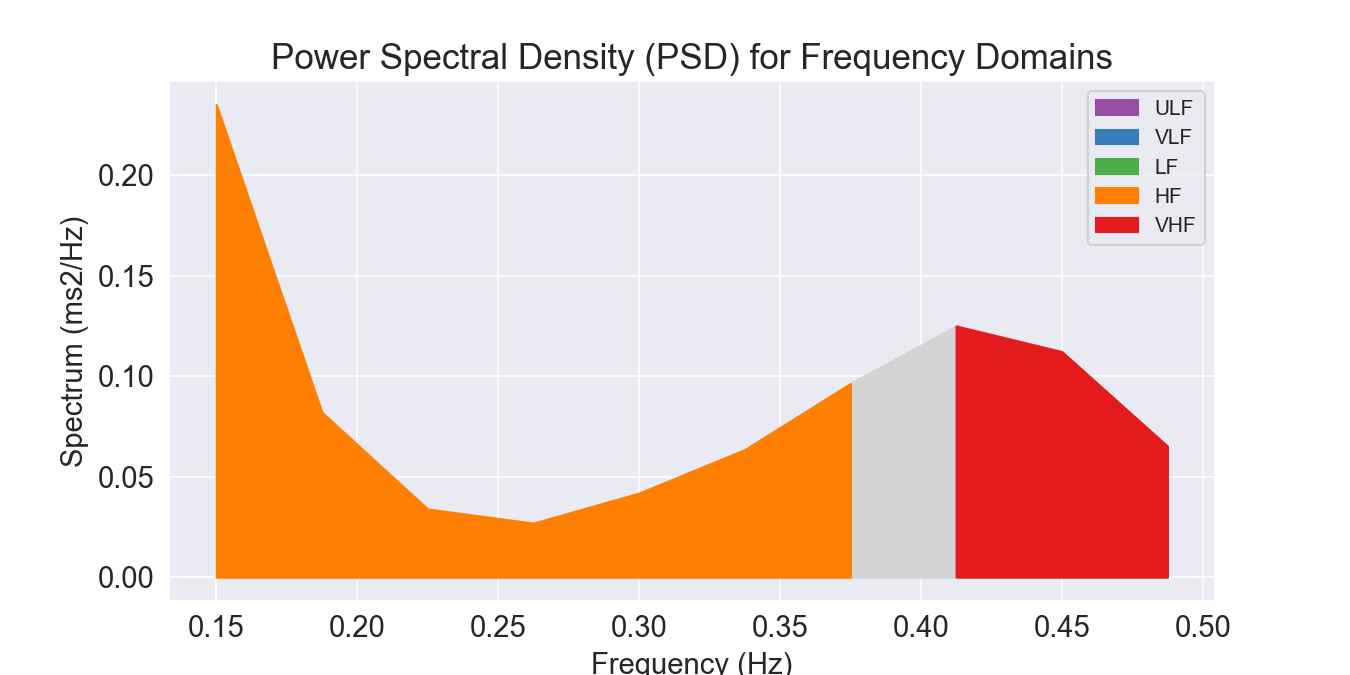

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,NaN,NaN,NaN,0.015517,0.007776,NaN,NaN,0.666185,-4.165792


In [199]:
peaks_all = pi_low_tl[4]['ECG_R_Peaks'][:48]
nk.hrv_frequency(peaks_all, sampling_rate=sampling_rate, show=True)

In [193]:
hrv_low[3]

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,NaN,NaN,NaN,0.015587,0.007813,NaN,NaN,0.666112,-4.16135


In [149]:
hrv_high

[   HRV_ULF  HRV_VLF  HRV_LF    HRV_HF   HRV_VHF  HRV_LFHF  HRV_LFn   HRV_HFn  \
 0      NaN      NaN     NaN  0.052843  0.001505       NaN      NaN  0.972303   
 
    HRV_LnHF  
 0 -2.940426  ,
    HRV_ULF  HRV_VLF  HRV_LF    HRV_HF   HRV_VHF  HRV_LFHF  HRV_LFn   HRV_HFn  \
 0      NaN      NaN     NaN  0.031287  0.002479       NaN      NaN  0.926592   
 
    HRV_LnHF  
 0 -3.464558  ,
    HRV_ULF  HRV_VLF  HRV_LF    HRV_HF   HRV_VHF  HRV_LFHF  HRV_LFn   HRV_HFn  \
 0      NaN      NaN     NaN  0.026839  0.000947       NaN      NaN  0.965903   
 
    HRV_LnHF  
 0 -3.617915  ,
    HRV_ULF  HRV_VLF  HRV_LF    HRV_HF   HRV_VHF  HRV_LFHF  HRV_LFn   HRV_HFn  \
 0      NaN      NaN     NaN  0.040241  0.002375       NaN      NaN  0.944269   
 
    HRV_LnHF  
 0 -3.212875  ]

In [150]:
hrv_med

[   HRV_ULF  HRV_VLF  HRV_LF    HRV_HF   HRV_VHF  HRV_LFHF  HRV_LFn   HRV_HFn  \
 0      NaN      NaN     NaN  0.008562  0.001428       NaN      NaN  0.857042   
 
    HRV_LnHF  
 0 -4.760381  ,
    HRV_ULF  HRV_VLF  HRV_LF    HRV_HF   HRV_VHF  HRV_LFHF  HRV_LFn  HRV_HFn  \
 0      NaN      NaN     NaN  0.067147  0.011605       NaN      NaN  0.85264   
 
    HRV_LnHF  
 0 -2.700876  ,
    HRV_ULF  HRV_VLF  HRV_LF    HRV_HF   HRV_VHF  HRV_LFHF  HRV_LFn  HRV_HFn  \
 0      NaN      NaN     NaN  0.040896  0.003656       NaN      NaN  0.91793   
 
    HRV_LnHF  
 0  -3.19673  ,
    HRV_ULF  HRV_VLF  HRV_LF    HRV_HF   HRV_VHF  HRV_LFHF  HRV_LFn   HRV_HFn  \
 0      NaN      NaN     NaN  0.014582  0.000505       NaN      NaN  0.966522   
 
    HRV_LnHF  
 0 -4.227979  ]

In [168]:
med_hrv_low = 0
med_hrv_high = 0
med_hrv_med = 0
for i in range(0,4):
    med_hrv_low+=hrv_low[i]['HRV_HFn']
    med_hrv_high+=hrv_high[i]['HRV_HFn']
    med_hrv_med += hrv_med[i]['HRV_HFn']
med_hrv_low = med_hrv_low/4
med_hrv_high = med_hrv_high/4
med_hrv_med = med_hrv_med/4
print(med_hrv_low)
print(med_hrv_med)
print(med_hrv_high)


0    0.917607
Name: HRV_HFn, dtype: float64
0    0.898534
Name: HRV_HFn, dtype: float64
0    0.952267
Name: HRV_HFn, dtype: float64


In [187]:
#lt.figure()
a=pi_high_tl[1]['ECG_R_Peaks'][:]
b = pi_high_tl[2]['ECG_R_Peaks'][:]
d=pd.concat([pi_high_tl[1]['ECG_R_Peaks'][:],
                     pi_high_tl[2]['ECG_R_Peaks'][:]])
x=np.concatenate((a,b))

#pi_high_tl[1]['ECG_R_Peaks'][:]

0.0

In [185]:
combine = np.concatenate((pi_high_tl[1]['ECG_R_Peaks'][:],
                     pi_high_tl[2]['ECG_R_Peaks'][:],
                     pi_high_tl[3]['ECG_R_Peaks'][:],
                     pi_high_tl[4]['ECG_R_Peaks'][:])
nk.hrv_frequency(combine, sampling_rate=sampling_rate, show=True)
#plt.title('High TL PSD')

SyntaxError: invalid syntax (<ipython-input-185-b003c5fd3a54>, line 5)

<IPython.core.display.Javascript object>


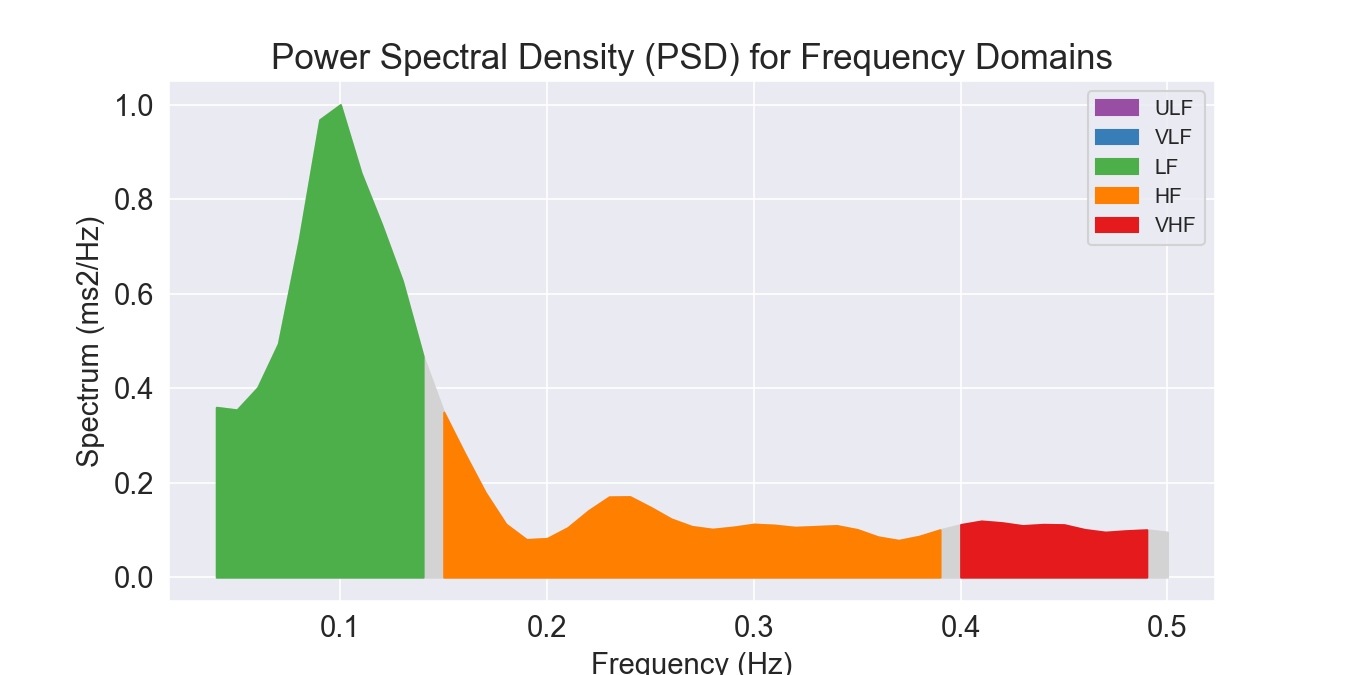

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,NaN,NaN,0.065711,0.030064,0.009657,2.185724,0.623256,0.285149,-3.50443


In [156]:
combine = pd.concat([pi_low_tl[1]['ECG_R_Peaks'][:],
                     pi_low_tl[2]['ECG_R_Peaks'][:],
                     pi_low_tl[3]['ECG_R_Peaks'][:],
                     pi_low_tl[4]['ECG_R_Peaks'][:]])
nk.hrv_frequency(combine, sampling_rate=sampling_rate, show=True)
#plt.title('Low TL PSD')

<IPython.core.display.Javascript object>


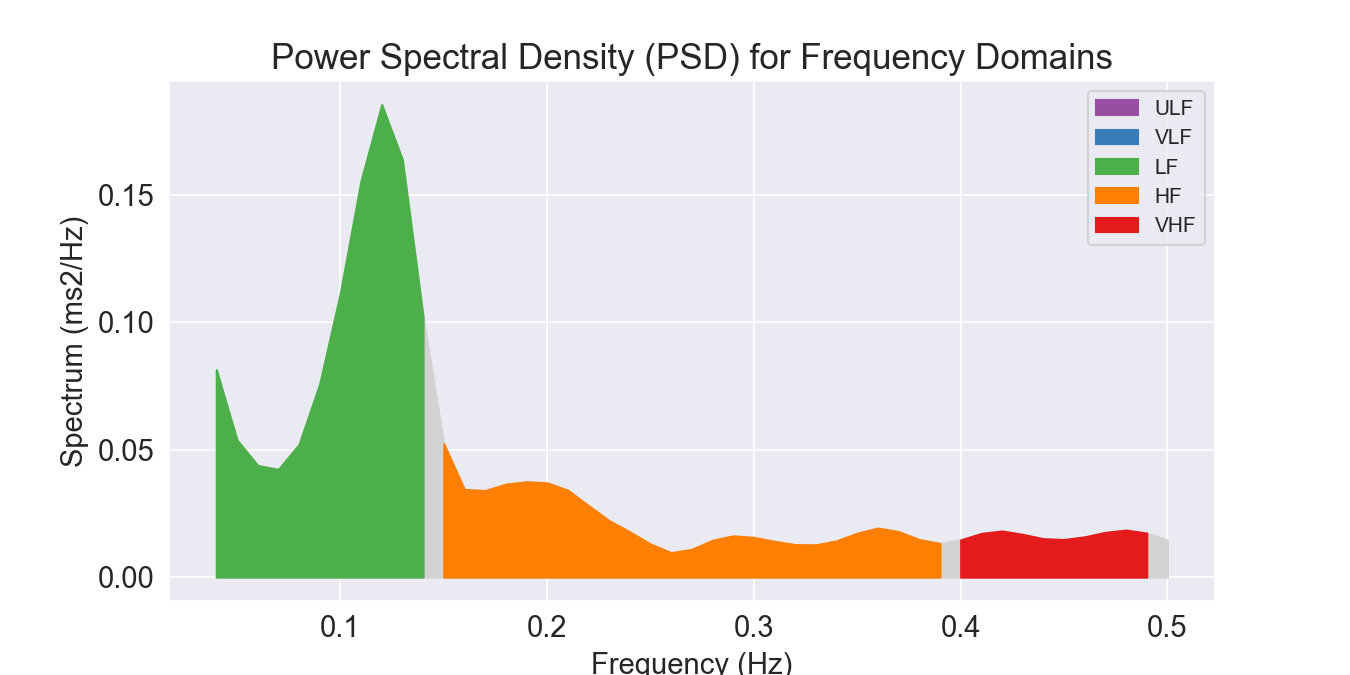

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,NaN,NaN,0.009758,0.005167,0.001497,1.888315,0.594196,0.31467,-5.265377


In [157]:
combine = pd.concat([pi_med_tl[1]['ECG_R_Peaks'][:],
                     pi_med_tl[2]['ECG_R_Peaks'][:],
                     pi_med_tl[3]['ECG_R_Peaks'][:],
                     pi_med_tl[4]['ECG_R_Peaks'][:]])
nk.hrv_frequency(combine, sampling_rate=sampling_rate, show=True)

In [155]:
plt.close('all')